In [309]:
import heapq
import itertools
import os
from copy import deepcopy

def get_locations(loc_filepath = 'locations.txt'):
    '''Read the file and return a list of all locations
    ''' 
    #---open the file and assign a file handler
    with open(loc_filepath,'r') as fh: 
        #populate the lines of the text into a list
       return [line.rstrip('\n') for line in fh]
        
    

In [310]:
print(len(get_locations()))

10


In [311]:
def get_distance_matrix(dist_filepath = 'distances.csv'):
    '''
    Read the file and return a list of lists or a 2D array with 
    distances such that dist_matrix[loc1][loc2] returns the distance from loc1 to loc2
    e.g. dist_matrix = [[0,4,9],
                        [4,0,8], 
                        [9,8,0]] for 3  sample locations
    '''
    dist_file = open(dist_filepath,'r')
    dist =  list(line.rstrip('\n').split(',') for line in dist_file)
    dist_int = [[int(col)for col in row]for row in dist]
    return dist_int

In [312]:
dist = get_distance_matrix()
for i in dist:
    print(i)

[0, 3588, 1361, 1000, 6427, 8854, 8469, 15635, 1580, 1241]
[3588, 0, 4661, 3040, 5285, 12322, 12041, 18982, 3258, 4338]
[1361, 4661, 0, 1628, 6196, 7667, 7412, 14732, 1686, 379]
[1000, 3040, 1628, 0, 5442, 9281, 9039, 16350, 672, 1297]
[6427, 5285, 6196, 5442, 0, 10761, 11341, 15463, 4861, 5877]
[8854, 12322, 7667, 9281, 10761, 0, 1069, 7201, 9124, 7984]
[8469, 12041, 7412, 9039, 11341, 1069, 0, 7329, 8992, 7760]
[15635, 18982, 14732, 16350, 15463, 7201, 7329, 0, 16312, 15087]
[1580, 3258, 1686, 672, 4861, 9124, 8992, 16312, 0, 1308]
[1241, 4338, 379, 1297, 5877, 7984, 7760, 15087, 1308, 0]


In [313]:
#----- Method to read the distance between two nodes
def dist_locations(from_node,to_node):
    from_ = location_names.index(from_node.name)
    to_ = location_names.index(to_node.name)
    return dist_matrix[from_][to_]


# Node Class

In [314]:
#--------- Generates a sucessor node
class Node:
    #---Constructor- declares a sucessor fringe node
    def __init__(self,name):
        self.name = name                 
        self.is_start = False
        self.is_visited = False
    
    def get_location_details(self):
        ''' Return a tuple representing the location with all its properties'''
        return self.name, self.is_start, self.is_visited



# StateSpace Definition

Captures the states uncovered by the search. The constructor of this class captures the following details

##### Action : Action applied on parent to get to the current state
##### gval   : Cost incurred to traverse to this node
##### Parent : detail of the parent node
##### Index  : Serves as the identifier for the state (numeric )





In [315]:
class StateSpace:
    '''Abstract class for defining State spaces for our search'''
    n = 0 # Counter for number of states, will also act as identifier for 
            # different states
        ##
    
    def __init__(self, action, gval, parent):
        '''
           self.action === the name of the action used to generate
            this state from parent. If it is the initial state we will
            supply the action name "START"
           self.gval === a number (integer or real) that is the cost
            of getting to this state.
           self.parent === parent the state from which this state was generated (by
              applying "action"
        '''
        self.action = action
        self.gval = gval
        self.parent = parent
        self.index = StateSpace.n
        StateSpace.n = StateSpace.n + 1

##---Prints the path from starting node to the current state(explored)        
    def print_path(self):
        '''print the sequence of actions used to reach self'''
        #can be over ridden to print problem specific information
        s = self
        states = []
        while s:
            states.append(s)
            s = s.parent
        #--- Here pop is used without any argument hence python will considdr this as pop(-1): Retruns last element
        #--- Hence the path will be returned from the starting note to the current state
        states.pop().print_state()
        while states:
            print(" ==> ", end="")
            states.pop().print_state()
            
        print("")
        
 #--- Compute the hash code of the current state and compare it againt the hash code of predecessor states.
 ##---Returns true if a match found;False otherwise
    def has_path_cycle(self):
        '''Returns true if self is equal to a prior state on its path'''
        s = self.parent
        hc = self.hashable_state()
        while s:
            if s.hashable_state() == hc:
                return True
            s = s.parent
        return False 

## Class tsp extends StateSpace


In [316]:
class tsp(StateSpace):
    #---Constructor definition
    def __init__(self, current_location, locations, action, gval, parent=None):
        StateSpace.__init__(self, action, gval, parent)
        self.locations = locations    # locations = [node1, node2, ... nodek]
        self.current_location = current_location
        
    def successors(self):
        '''Return list of tsp objects that are the
        successors of the current object'''
        States = []
        current_location = self.current_location
        unvisited_locations = self.get_unvisited()
        
        for location in unvisited_locations:
            new_gval = self.gval + dist_locations(current_location, location)
            new_locations = deepcopy(self.locations)
            current_index = self.locations.index(location)
            new_locations[current_index].is_visited = True
            States.append(tsp(new_locations[current_index], new_locations, 
                'Move to {}'.format(location.name), new_gval, self))
            
        if not unvisited_locations:
            # move from currrent location back to start
            start_location = self.get_start()
            new_gval = self.gval + dist_locations(current_location, start_location)
            new_locations = deepcopy(self.locations)
            current_index = self.locations.index(start_location)
            new_locations[current_index].is_visited = True
            States.append(tsp(new_locations[current_index], new_locations, 
                'Move to {}'.format(start_location.name), new_gval, self))            
        return States
    
    def hashable_state(self):
        '''Return a data item that can be used as a dictionary key to UNIQUELY represent
         the state.'''
        hash_list = []
        for location in self.locations:
            hash_list.append(location.get_location_details())
            
        hash_list.insert(0, (self.current_location).get_location_details())
        
        return tuple(sorted(hash_list))
    
    def print_state(self):
        '''Helper function to print the state
        '''
        if self.parent:
            print("Action= \"{}\", S{}, g-value = {}, (From S{})".format(self.action, self.index, self.gval, self.parent.index))
        else:
            print("Action= \"{}\", S{}, g-value = {}, (Initial State)".format(self.action, self.index, self.gval))
            return [location for location in self.locations if not location.is_visited]
                   
    def get_unvisited(self): # returns list of unvisited locations
        return [location for location in self.locations if not location.is_visited]
    
    def get_start(self): # returns Node of start location
        for location in self.locations:
            if location.is_start:
                return location


### Check if the current state is goal state
---All states should be visited and current location should be the starting point 

In [317]:
def tsp_goal_fn(state):
    '''All states should be visited and our current location should be 
    the starting location so as to complete a tour'''
    return not state.get_unvisited() and (state.current_location).is_start


### This method records the initial state.
###### This creates the initial state and returns an object TSP with the initial state. This state is not marked visited until we reach the goal state
Meaning the trip starts from a point and ends at the same point

In [318]:
def make_init_state(locations,start_location = 1):
    """
    locations = list of locations. 
    Returns a tsp object with initialized state
    """
    i=1
    all_locations = []
    for location in locations:
        new_location = Node(location)
        
        if i==start_location:
            new_location.is_start = True
            all_locations.insert(0,new_location)
        else:
            all_locations.append(new_location)
        i = i+1
    current_location = all_locations[0]
    current_location.is_visited = True
    
    return tsp(current_location, all_locations, "START", 0)


## Heuristic Definition
#### Heur_zero - Returns 0 (No Heuristic returned as Result). This can be leveraged for uniform cost search

#### Heur_Euclidean - Returns (minimum distance from current location to any of the unvisited location+minimum distance from starting location location to any of the unvisited location)

#### Heur_MST_Euclidean - 

##### Spanning Tree is a subset of edges (of graph G) containing all the vertices of the graph G:
##### Minimum Spanning tree: Given a weighted graph G = (V,E) & edge weights W: E->Real number, Minimum spanning tree is the tree with minimum weight (Sum(w(E))



In [319]:
def heur_zero(state):
    '''Zero Heuristic use to make A* search perform uniform cost search'''
    return 0


def heur_Euclidean(state):
    '''The MIN from all unvisited locations {
       The euclidean distance to the unvisited location from the current location + 
       The euclidean distance from that unvisited location back to the start location }
    '''
    current_location = state.current_location
    d1 = [dist_locations(current_location, location) for location in state.get_unvisited()]
    
    start_location = state.get_start()
    d2 = [dist_locations(start_location, location) for location in state.get_unvisited()]
    
    if not d1 and not d2:
        return 0
    else:
        return min(d1) + min(d2)


def heur_MST_Euclidean(state):
    '''Estimated Euclidean distance to travel all the unvisited nodes
       starting from the current location + heur_Euclidean.'''
    return MST(state, dist_locations) + heur_Euclidean(state)


In [320]:
def MST(state, func):
    ''' We will use Kruskal's algorithm. But we could also use Prim's if we wanted to.
        1. Sort the edges of G in ascending (non-decreasing) order
        2. Return the edge costs of the Minimum Spanning Tree
    '''
    #---Get the unvisited location which are yet to be explored
    unvisited_locations = state.get_unvisited()
    #--- find combination of all possible vertices
    location_pairs = itertools.combinations(unvisited_locations, 2)
    
    #---For all possible combination of unvisited vertices find the distance between them and sort them in ascending order
    edges = []
    for x,y in location_pairs:
        edges.append((func(x, y), (x,y)))
    edges = sorted(edges, key=lambda x: x[0])
    
    #---Collect the distance from each unvisited node to other unvisited node into the dictionary
    G = {}
    for c in unvisited_locations:
        G[c.name] = {}
        
    for e in edges:
        location1 = e[1][0].name
        location2 = e[1][1].name
        edge = e[0]
        G[location1][location2] = edge
        G[location2][location1] = edge

    return MinimumSpanningCost(G)

In [321]:
class UnionFind:
    """Union-find data structure.
    Each unionFind instance X maintains a family of disjoint sets of
    hashable objects, supporting the following two methods:
    - X[item] returns a name for the set containing the given item.
      Each set is named by an arbitrarily-chosen one of its members; as
      long as the set remains unchanged it will keep the same name. If
      the item is not yet part of a set in X, a new singleton set is
      created for it.
    - X.union(item1, item2, ...) merges the sets containing each item
      into a single larger set.  If any item is not yet part of a set
      in X, it is added to X as one of the members of the merged set.
    """

    def __init__(self):
        """Create a new empty union-find structure."""
        self.weights = {}
        self.parents = {}

    def __getitem__(self, object):
        """Find and return the name of the set containing the object."""
#-- if the object is not present create a singleton set and return the object as the name of the set
        # check for previously unknown object
        if object not in self.parents:
            self.parents[object] = object
            self.weights[object] = 1
            return object
#-- if the object is already found, then traverse the parent and then merge that edge 
        # find path of objects leading to the root
        path = [object]
        root = self.parents[object]
        while root != path[-1]:
            path.append(root)
            root = self.parents[root]

        # compress the path and return
        for ancestor in path:
            self.parents[ancestor] = root
        return root
        
    def __iter__(self):
        """Iterate through all items ever found or unioned by this structure."""
        return iter(self.parents)

    def union(self, *objects):
        """Find the sets containing the objects and merge them all."""
        roots = [self[x] for x in objects]
        heaviest = max([(self.weights[r],r) for r in roots])[1]
        for r in roots:
            if r != heaviest:
                self.weights[heaviest] += self.weights[r]
                self.parents[r] = heaviest


def MinimumSpanningCost(G):
    """
    Return the minimum spanning tree of an undirected graph G.
    G should be represented in such a way that iter(G) lists its
    vertices, iter(G[u]) lists the neighbors of u, G[u][v] gives the
    length of edge u,v, and G[u][v] should always equal G[v][u].
    The tree is returned as a list of edges.
    """
    if not isUndirected(G):
        raise ValueError("MinimumSpanningTree: input is not undirected")
    for u in G:
        for v in G[u]:
            if G[u][v] != G[v][u]:
                raise ValueError("MinimumSpanningTree: asymmetric weights")

    # Kruskal's algorithm: sort edges by weight, and add them one at a time.
    # We use Kruskal's algorithm, first because it is very simple to
    # implement once UnionFind exists, and second, because the only slow
    # part (the sort) is sped up by being built in to Python.
    subtrees = UnionFind()
    #tree = []
    cost = 0
    for W,u,v in sorted((G[u][v],u,v) for u in G for v in G[u]):
        if subtrees[u] != subtrees[v]:
            cost += G[u][v]
            subtrees.union(u,v)

    return cost


In [322]:
def isUndirected(G):
    """Check that G represents a simple undirected graph."""
    for v in G:
        if v in G[v]:
            return False
        for w in G[v]:
            if v not in G[w]:
                return False
    return True


_SUM_HG = 0

In [323]:
class sNode:
    '''Object of this class form the nodes of the search space.  Each
    node consists of a search space object (determined by the problem
    definition) along with the h and g values (the g values is
    redundant as it is stored in the state, but we make a copy in the
    node object for convenience), and a the number of the node'''
    
    n = 0
    lt_type = _SUM_HG
    
    def __init__(self, state, hval):
        self.state = state
        self.hval = hval
        self.gval = state.gval
        self.index = sNode.n
        sNode.n = sNode.n + 1

    def __lt__(self, other):
        ''' For the f-value
           we wish to break ties by letting node1 < node2 if they both
           have identical f-values but if node1 has a SMALLER g
           value. This means that we expand nodes along shorter paths
           first causing the search to proceed directly to the goal'''
        
        if sNode.lt_type == _SUM_HG:
            if (self.gval+self.hval) == (other.gval+other.hval):
                #break ties by smallest gval. 
                return self.gval < other.gval
            else: return ((self.gval+self.hval) < (other.gval+other.hval))
        if sNode.lt_type == _G:
            return self.gval < other.gval
        if sNode.lt_type == _H:
            return self.hval < other.hval
        print('sNode class has invalid comparator setting!')
        return self.gval < other.gval


In [324]:
    class Open:
        '''Open objects hold the search frontier---the set of unexpanded
           nodes. Depending on the search strategy used we want to extract
           nodes from this set in different orders, so set up the object's
           functions to operate as needed by the particular search
           strategy'''

        def __init__(self):
            #use priority queue for OPEN (first out is node with
            #lowest fval = gval+hval)
            self.open = []
            #set node less than function to compare sums of hval and gval
            sNode.lt_type = _SUM_HG
            self.insert = lambda node: heapq.heappush(self.open, node)
            self.extract = lambda: heapq.heappop(self.open)


        def empty(self): 
            return not self.open

        def print_open(self):
            print("{", end="")
            if len(self.open) == 1: 
                print("OPEN   <S{}:{}:{}, g={}, h={}, f=g+h={}>".format(self.open[0].state.index, self.open[0].state.action, self.open[0].state.hashable_state(), self.open[0].gval, self.open[0].hval, self.open[0].gval+self.open[0].hval), end="")
            else:
                for nd in self.open:
                    print("OPEN   <S{}:{}:{}, g={}, h={}, f=g+h={}>".format(nd.state.index, nd.state.action, nd.state.hashable_state(), nd.gval, nd.hval, nd.gval+nd.hval), end="")
            print("}")

        def clear(self): 
            self.open = []



In [325]:
def _zero_hfn(state):
    '''Null heuristic (zero)'''
    return 0


In [326]:
class IDASearchEngine:
    def __init__(self):
        self.trace = 0

    def initStats(self):
        sNode.n = 0
        StateSpace.n = 1    #initial state already generated on call so search
        self.total_search_time = 0
        self.cycle_check_pruned = 0
        self.total_search_time = os.times()[0]

    def trace_on(self, level = 1):
        '''For debugging, set tracking level 1 or 2'''
        self.trace = level

    def trace_off(self):
        '''Turn off tracing'''
        self.trace = 0

    def get_strategy(self):
        rval = 'ida* with full cycle checking'
        return rval

    def search(self, initState, goal_fn, ss, heur_fn=_zero_hfn, LIMIT=1):
        #Perform full cycle checking as follows
        #a. check state before inserting into OPEN. If we had already reached
        #   the same state via a cheaper path, don't insert into OPEN.
        #b. Sometimes we find a new cheaper path to a state (after the older
        #   more expensive path to the state has already been inserted.
        #   We deal with this lazily. We check states extracted from OPEN
        #   and if we have already expanded that state via a cheaper path
        #   we don't expand it. If we had expanded the state via a more
        #   expensive path, we re-expand it.
     
        ### Step1: Call the function to initialize the Search Stats (1 line)
        self.initStats()

        #BEGIN TRACING
        if self.trace:
            print("   TRACE: Search Strategy: ", self.get_strategy())
            print("   TRACE: Initial State:", end="")
            initState.print_state()
        #END TRACING

        # Step 2: Instantiate an object of Open class (1 line)
        OPEN = Open()

        # Step 3: Create the first node in search space using the argument passed as initState and value of
        # heuristic function for that initState (1-3 lines)
        fnode = sNode(initState,heur_fn(initState))

        # Step 4: Create a cycle check dictionary. This will store the cheapest path (g-val) found
        #so far to a state. (1 lines)
        self.cc_dictionary = {}

        # Step 5: Store the first state as a hashable as key and it's gval as value(1-2 lines)
        hashKey = initState.hashable_state()
        self.cc_dictionary[hashKey] = initState.gval
        # Step 6: insert the search space node in object of Open data structure using the insert function(1 line)
        OPEN.insert(fnode)

        ###Step 7: NOW peform the search by calling searchOpen and return the result as Node in search space.
            #(1 line)
        goal_node = self.searchOpen(OPEN, goal_fn, heur_fn, ss, LIMIT, initState)
        
        # if success check :
        if goal_node:
            print("Search Successful!")
            print("   Strategy = '{}, Depth Level = {}'".format(self.get_strategy(), LIMIT))
            print("   Solution cost = {}".format(round(goal_node.gval)))

            goal_node.state.print_path()
            self.total_search_time = os.times()[0] - self.total_search_time
            print("Search time = {}, nodes expanded = {}, states generated = {}, states cycle check pruned = {}".format(self.total_search_time,sNode.n, StateSpace.n, self.cycle_check_pruned))
            return goal_node.state
        else:
            if LIMIT < len(initState.locations):
                # Insert code here (1 line). What happens to the limit if current limit
                #does not find a solution in IDA* ?
                LIMIT += heur_fn(fnode.state)

                return self.search(initState, goal_fn, ss, heur_fn, LIMIT)

        #exited the while without finding goal---search failed

            print("Search Failed! (strategy '{}') No solution found".format(self.get_strategy()))
            self.total_search_time = os.times()[0] - self.total_search_time
            print("Search time = {}, nodes expanded = {}, states generated = {}, states cycle check pruned = {}".format(self.total_search_time,sNode.n, StateSpace.n, self.cycle_check_pruned))
            return False
        
        
        

    def searchOpen(self, OPEN, goal_fn, heur_fn, ss, LIMIT, initState):
        '''Open has some nodes on it, now search from that state of OPEN'''

        #BEGIN TRACING
        if self.trace:
            print("   TRACE: Initial OPEN: ", OPEN.print_open())
            
            print("   TRACE: Initial CC_Dict:", self.cc_dictionary)
        #END TRACING

        DEPTH = 1       # USED FOR IDA_STAR
        while not OPEN.empty():
            # Extract the node in OPEN using function defined in init and assign it to a
            #  variable called node. (1 line)
            node = OPEN.extract()

            #BEGIN TRACING
            if self.trace:
                print("   TRACE: Next State to expand: <S{}:{}:{}, g={}, h={}, f=g+h={}>".format(node.state.index, node.state.action, node.state.hashable_state(), node.gval, node.hval, node.gval+node.hval))
                if node.state.gval != node.gval:
                    print("ERROR: Node gval not equal to state gval!")
            #END TRACING
            #Check if current state of node is the goal state using previously defined function to
            # check goal.
            if goal_fn(node.state):
                #node at front of OPEN is a goal...search is completed.
                return node

             #All states reached by a search node on OPEN have already
             #been hashed into the self.cc_dictionary. However,
             #before expanding a node we might have already expanded
             #an equivalent state with lower g-value. So only expand
             #the node if the hashed g-value is no greater than the
             #node's current g-value. 

            #BEGIN TRACING
            if self.trace:
                print("   TRACE: CC_dict gval={}, node.gval={}".format(self.cc_dictionary[node.state.hashable_state()], node.gval))
            #END TRACING

            if self.cc_dictionary[node.state.hashable_state()] < node.gval:
                continue

            successors = [] 
            # LIMIT THE DEPTH FOR ITERATIVE DEEPENING A_STAR
            if LIMIT == DEPTH:
                pass
            else:
                # Get successors from current state of the node.(1 line)
                successors = node.state.successors() 
                  
            #Increment depth by 1. (1 line)
            DEPTH += 1
            

            #BEGIN TRACING
            if self.trace:
                print("   TRACE: Expanding Node. Successors = {", end="")
                for ss in successors:
                    print("<S{}:{}:{}, g={}, h={}, f=g+h={}>, ".format(ss.index, ss.action, ss.hashable_state(), ss.gval, heur_fn(ss), ss.gval+heur_fn(ss)), end="")
                print("}")
            #END TRACING

            for succ in successors:
                # Get a hashable state for each successor. (1 line)
                hash_state = succ.hashable_state()

                #BEGIN TRACING
                if self.trace > 1:
                    print("   TRACE: Successor State:", end="")
                    print("<S{}:{}:{}, g={}, h={}, f=g+h={}>, ".format(succ.index, succ.action, succ.hashable_state(), succ.gval, heur_fn(succ), succ.gval+heur_fn(succ)), end="")
                    if hash_state in self.cc_dictionary:
                        print("   TRACE: Already in CC_dict, CC_dict gval={}, successor state gval={}".format(self.cc_dictionary[hash_state], succ.gval))
                #END TRACING
                # Check for conditions if we want to remove this succ. i.e. same state should not already
                # exist in the cc_dictionary and cost of reaching this succ is costlier than one in cc
                # (1-2 lines)
                #state_explored = hash_state in self.cc_dictionary
                #costly = succ.gval > self.cc_dictionary[hash_state]
                         
                prune_succ = hash_state in self.cc_dictionary and succ.gval > self.cc_dictionary[hash_state]

                if prune_succ :
                    # Increment counter for pruned succ (1 line)
                    self.cycle_check_pruned += 1

                    #BEGIN TRACING
                    if self.trace > 1:
                        print(" TRACE: Successor State pruned by cycle checking")
                    #END TRACING
                    continue

                #passed all cycle checks...add to open
                # i.e. New state reached, create a new search space node and add it to OPEN for
                # extracting it in next iteration. (1 -2 lines)
                new_node = sNode(succ,heur_fn(succ))
                OPEN.insert(new_node)
 

                #BEGIN TRACING
                if self.trace > 1:
                    print(" TRACE: Successor State added to OPEN")
                #END TRACING

                #record cost of this path in cc dictionary.(1 line)
                self.cc_dictionary[hash_state] = succ.gval

        #end of while--OPEN is empty and no solution
        return False

In [327]:
def draw_final_path(state):
    
    if not state:
        return None
    
    states = []
    while state:
        states.append(state)
        state = state.parent
        
    locations = [state.current_location for state in states]
    locations.reverse()
    
    print("----------------------------------------------------------------------------------------------------------------------")
    print('Path:')
    print("----------------------------------------------------------------------------------------------------------------------\n")
    
    for i, location in enumerate(locations):
        if i != len(locations)-1:
            print(location.name+ " ==> ",end='')
        else:
            print(location.name)
    return locations
        


if __name__ == '__main__':
    dist_filepath =  'distances.csv'
    loc_filepath =  'locations.txt'

    #Get distance matrix and location list
    dist_matrix = get_distance_matrix(dist_filepath)
    location_names = get_locations(loc_filepath)

    se = IDASearchEngine()
    state = make_init_state(location_names,1)
    ss = 1
    final = se.search(state, tsp_goal_fn, ss,eval('heur_MST_Euclidean'))
    loc_det = draw_final_path(final)


Search Successful!
   Strategy = 'ida* with full cycle checking, Depth Level = 27932'
   Solution cost = 42980
Action= "START", S0, g-value = 0, (Initial State)
 ==> Action= "Move to Stockholm, Sweden", S9, g-value = 1241, (From S0)
 ==> Action= "Move to Tallinn, Estonia", S19, g-value = 1620, (From S9)
 ==> Action= "Move to Shanghai, China", S95, g-value = 9032, (From S19)
 ==> Action= "Move to Itsukushima Shrine, Japan", S994, g-value = 10101, (From S95)
 ==> Action= "Move to Brisbane, Australia", S1770, g-value = 17302, (From S994)
 ==> Action= "Move to Montreal, Canada", S1774, g-value = 32765, (From S1770)
 ==> Action= "Move to Teide, Spain", S1776, g-value = 38050, (From S1774)
 ==> Action= "Move to Edinburgh, Scotland", S1871, g-value = 41308, (From S1776)
 ==> Action= "Move to Brugge, Belgium", S1898, g-value = 41980, (From S1871)
 ==> Action= "Move to St. Stephan's Cathedral, Austria", S1899, g-value = 42980, (From S1898)

Search time = 0.359375, nodes expanded = 1331, states 

In [328]:
from mpl_toolkits.basemap import Basemap as Map
import matplotlib.pyplot as plt
import csv

def get_coord(loc_filepath = 'location_coordinates.csv'):
    co_ord = {}
    with open(loc_filepath,'r') as csv_file:
        csv_reader = csv.reader(csv_file,delimiter=',',quotechar='"')
        i = 0
        for row in csv_reader:
            if i==0:
                i += 1
                continue
            co_ord[row[0].replace(',  ',', ')] = (float(row[1]),float(row[2]))
    return co_ord




In [329]:
co_ord = get_coord()
print(co_ord)

{"St. Stephan's Cathedral, Austria": (48.2084, 16.3735), 'Teide, Spain': (28.2723, -16.6425), 'Tallinn, Estonia': (59.437, 24.7536), 'Brugge, Belgium': (51.2093, 3.2247), 'Montreal, Canada': (45.5017, -73.5673), 'Itsukushima Shrine, Japan': (34.296, 132.3199), 'Shanghai, China': (31.2304, 121.4737), 'Brisbane, Australia': (-27.4698, 153.0251), 'Edinburgh, Scotland': (55.9533, -3.1883), 'Stockholm, Sweden': (59.3293, 18.0686)}


In [330]:
    #print(location.name)
    def draw_map(co_ord,loc_det):
        lat = []
        lon = []
        label = []


        for location in loc_det:
            lon.append(co_ord[location.name][1])
            lat.append(co_ord[location.name][0])
            label.append(location.name)
        plt.figure(figsize=(20,30))
        
        m= Map(projection='mill',llcrnrlat=-40,urcrnrlat=70,llcrnrlon=-80,urcrnrlon=170,resolution='l')
        #m=Map(projection='',resolution =None)
        m.drawcoastlines()
        m.drawcountries()
        m.drawmapboundary(fill_color='skyblue')
        m.fillcontinents(color='burlywood',lake_color='skyblue')
        m.drawstates()
        x,y = m(lon,lat)
        m.plot(x,y,'rd--')
        for i in range(len(label)):
            if(i!=len(label)-1):
                visit = str(i+1)+'.'+label[i]
                plt.annotate(visit,xy=m(lon[i],lat[i]),arrowprops=dict(facecolor='blue', shrink=0.20),bbox=dict(boxstyle="round", fc="w"))
        
        plt.show()    
    
    

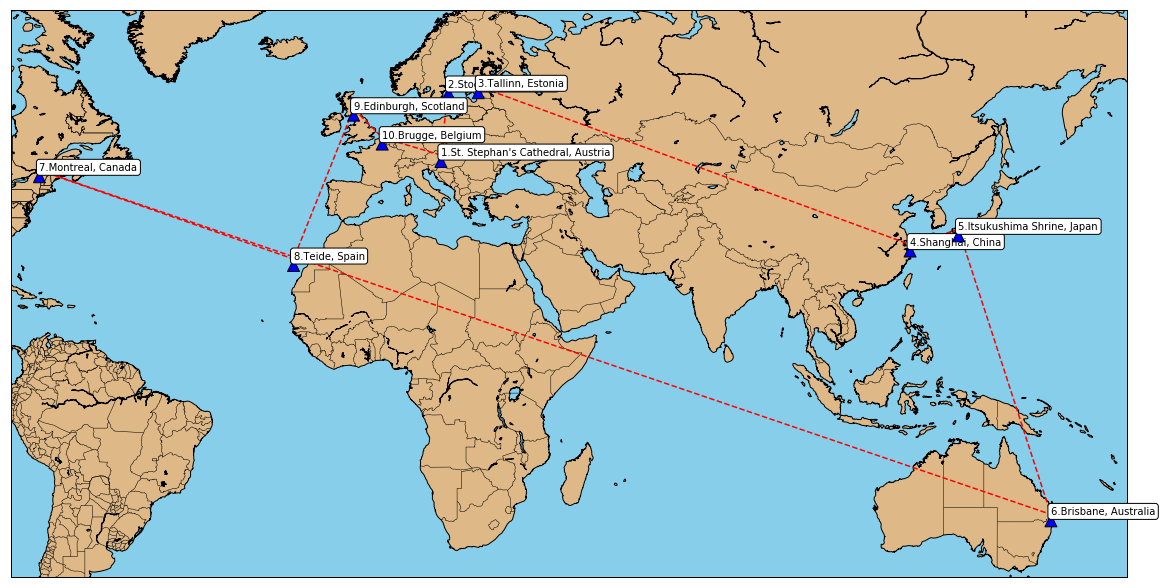

In [331]:
draw_map(co_ord,loc_det)